In [10]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile

Iteration Number: 100%|██████████| 10000/10000 [04:32<00:00, 36.75it/s]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


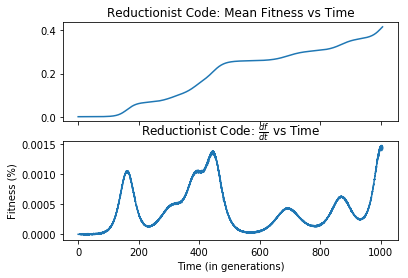

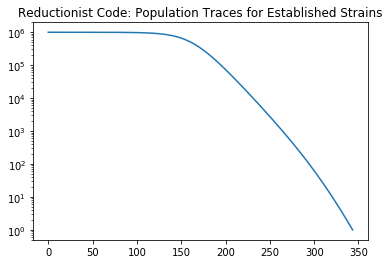

In [9]:
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
#table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
sim.simulate(1000, dt, T_curr, mut_param)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

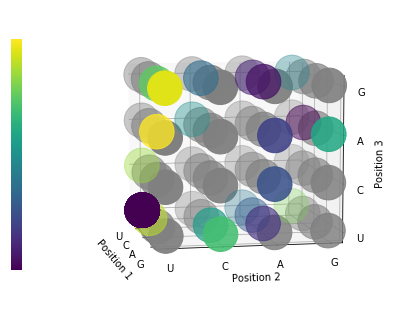

Iteration Number:   4%|▎         | 372/10050 [00:02<01:16, 126.85it/s]



KeyboardInterrupt: 

In [27]:
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
table.plot3d()
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Reductionist Code'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [25]:
# import datafiles
with open('res/2-14 Traces/2-15_Standard Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    standard_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-15_Fast Fail_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    fastfail_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)


/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


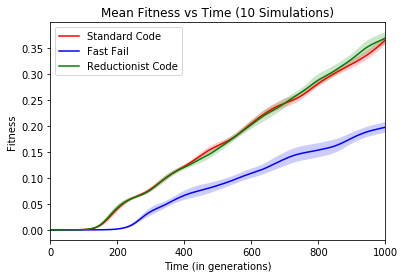

In [26]:
ax1 = sns.tsplot(data=standard_df, time='time', value='value', unit='sim', condition='code', color='red')
ax2 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax3 = sns.tsplot(data=reductionist_df, time='time', value='value', unit='sim', condition='code', color='green')
plt.legend()
plt.title('Mean Fitness vs Time (10 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-15_F_avg_T=1000_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()

In [28]:
with open('res/2-14 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)

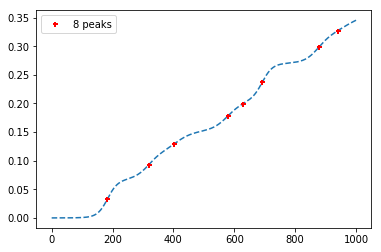

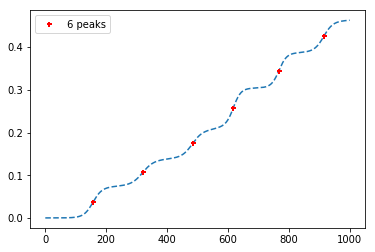

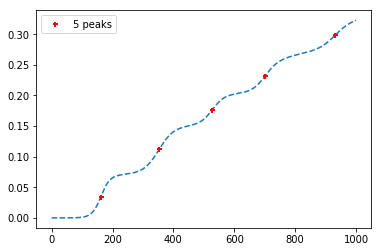

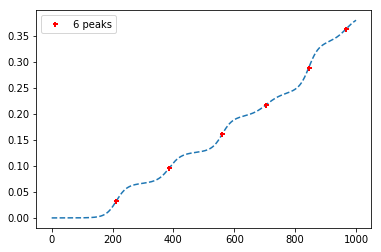

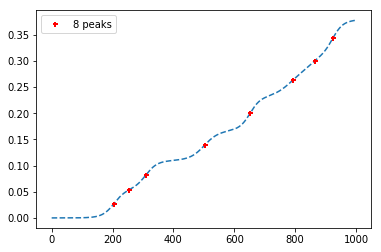

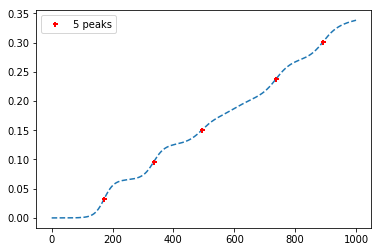

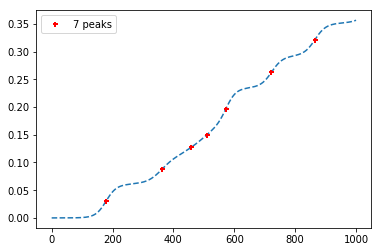

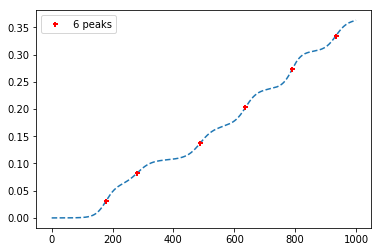

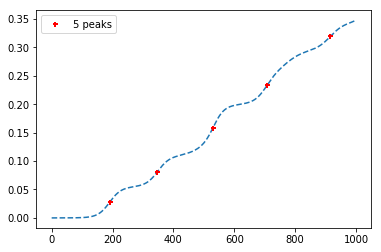

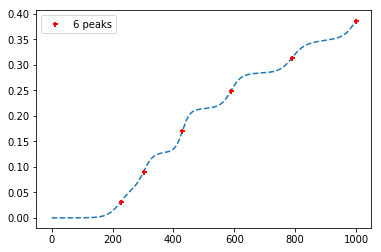

In [9]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile
#import pickle
with open('res/2-14 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)
# loop over sims
sims = set(reductionist_df['sim'].values)
t_lag = np.zeros(len(sims))
for i, sim in enumerate(sims):
    # extract data for this sim
    data = reductionist_df[reductionist_df['sim'] == sim]
    t = data['time'].values
    f = data['value'].values
    # smooth with gaussian filter
    gaussian_filter = gaussian(30, 10)
    filtered_signal = convolve1d(f, gaussian_filter/gaussian_filter.sum())
    # calculate first derivative  
    dt = np.diff(t)
    t_avg = (t[1:]+t[:-1])/2
    filt_grad = np.diff(filtered_signal)/dt
    # find peaks
    peak_ind = peakutils.indexes(filt_grad, thres=0.3, min_dist=int(50/dt.mean()))
    # get timestamp for this point
    t_lag[i] = t_avg[peak_ind[0]]
    pplot(t, f, peak_ind)
    plt.show()

In [28]:
ax = sns.violinplot(data=t_lag)
plt.title('Distribution of Lag Times (N=50)')
plt.ylabel('Lag Time (in generations)')
plt.savefig('bonkersRed.pdf')

In [10]:
data = [t_sc, t_ff, t_col]
codes = ['Standard Code', 'Fast Fail', 'Reductionist Code','Colorado']
dfs = []
for (series, code) in zip(data, codes):
    df = pd.DataFrame({
        't_lag' : series,
        'code' : [code for i in range(len(series))]
    })
    dfs.append(df)
all_data = pd.concat(dfs)

NameError: name 't_sc' is not defined

In [31]:
ax = sns.violinplot(x='code', y='t_lag', data=all_data)
plt.title('Distribution of Lag Times (N=50)')
plt.ylabel('Lag Time (in generations)')
plt.savefig('bonkersRed.pdf')

NameError: name 'all_data' is not defined

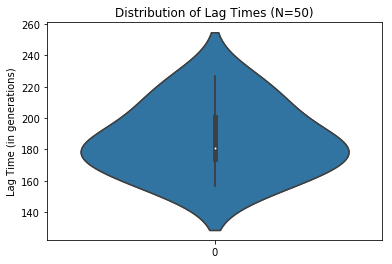

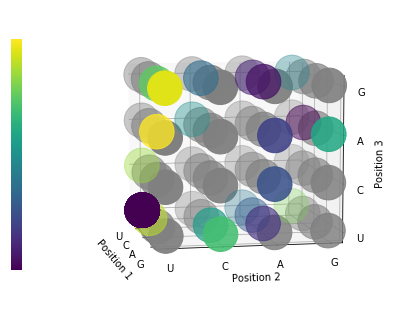

Iteration Number:  40%|███▉      | 3954/10000 [02:04<03:10, 31.67it/s]

KeyboardInterrupt: 

Iteration Number:  40%|███▉      | 3954/10000 [02:20<03:34, 28.23it/s]

In [30]:
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
sim.simulate(1000, dt, T_curr, mut_param)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

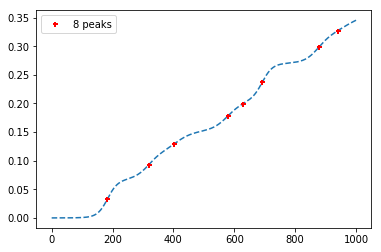

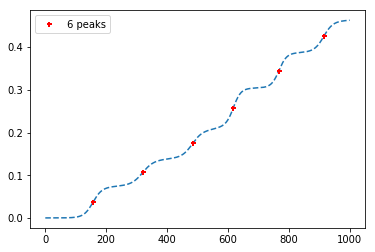

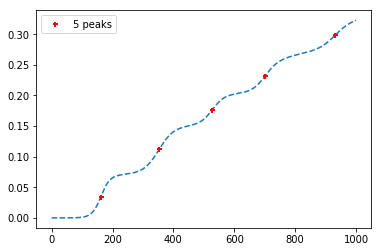

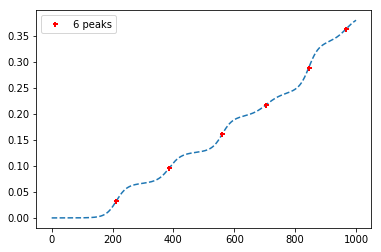

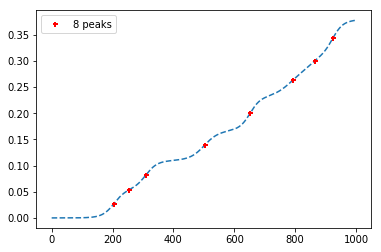

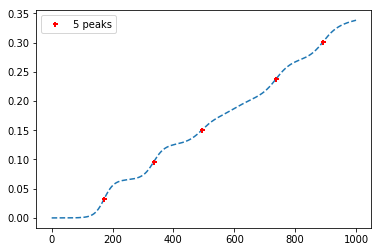

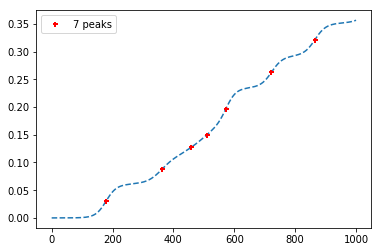

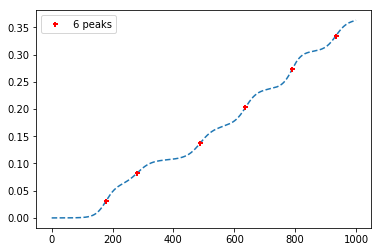

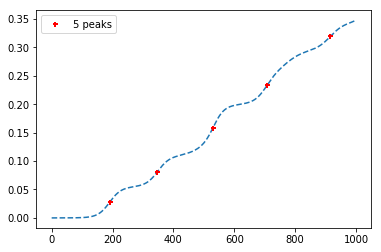

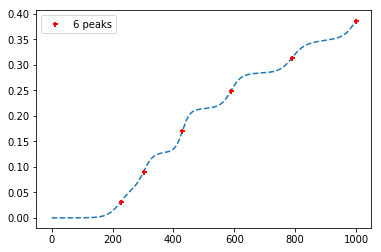

In [35]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile
#import pickle
with open('res/2-14 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)
# loop over sims
sims = set(reductionist_df['sim'].values)
t_lag = np.zeros(len(sims))
for i, sim in enumerate(sims):
    # extract data for this sim
    data = reductionist_df[reductionist_df['sim'] == sim]
    t = data['time'].values
    f = data['value'].values
    # smooth with gaussian filter
    gaussian_filter = gaussian(30, 10)
    filtered_signal = convolve1d(f, gaussian_filter/gaussian_filter.sum())
    # calculate first derivative  
    dt = np.diff(t)
    t_avg = (t[1:]+t[:-1])/2
    filt_grad = np.diff(filtered_signal)/dt
    # find peaks
    peak_ind = peakutils.indexes(filt_grad, thres=0.3, min_dist=int(50/dt.mean()))
    # get timestamp for this point
    t_lag[i] = t_avg[peak_ind[0]]
    pplot(t, f, peak_ind)
    plt.show()

In [36]:
codes = [ 'Fast Fail', 'Reductionist Code']
dfs = []
for (series, code) in zip(data, codes):
    df = pd.DataFrame({
        't_lag' : series,
        'code' : [code for i in range(len(series))]
    })
    dfs.append(df)
all_data = pd.concat(dfs)

In [39]:
ax = sns.violinplot(x='code', y='t_lag', data=all_data)
plt.title('Distribution of Lag Times (N=50)')
plt.ylabel('Lag Time (in generations)')
plt.savefig('bonkers.pdf')

ValueError: Neither the `x` nor `y` variable appears to be numeric.